# Multiclass Prediction Cirrhosis Outcomes

### EDA Checklist

* What question(s) are you trying to solve (or prove wrong)?
    - What is our target and what do we want to accomplish 
* What kind of data do you have and how do you treat different types?
    - Numerical - Categorical (what is the best way to encode for this data ?)
* What’s missing from the data and how do you deal with it?
    - Imputing
* Where are the outliers and why should you care about them?
    - Visualization, distribution
* How can you add, change or remove features to get more out of your data?
    - Feature engineering

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, MaxAbsScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss

# model imports
# logistic regression
from sklearn.linear_model import LogisticRegression
# tensorflow
import tensorflow as tf
from tensorflow.keras.utils import plot_model
# Support Vector Machines
from sklearn.svm import SVC

print('imports finished')
print('imports done')

2024-01-26 12:12:16.080538: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


imports finished
imports done


## Load Data

In [2]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')
print('data loaded')

data loaded


In [3]:
# split the data
train_dataset, val_dataset = train_test_split(train_data, test_size=0.3, random_state=42)
print('data splitted')

data splitted


In [4]:
# extract the labels
train_labels = train_dataset.pop('Status')
val_labels = val_dataset.pop('Status')
print('labels extracted')

print(train_labels.shape)
print(val_labels.shape)

labels extracted
(5533,)
(2372,)


## EDA

### Basic Statistics

In [5]:
# general info
print(train_dataset.shape)
print(val_dataset.shape)
print(train_dataset.info)

(5533, 19)
(2372, 19)
<bound method DataFrame.info of         id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders  \
3755  3755    3839          Placebo  18352   M       N            N       N   
4010  4010    3445          Placebo  23445   F       N            Y       Y   
2656  2656    1447          Placebo  25873   F       Y            Y       N   
4320  4320      71          Placebo  20567   F       Y            Y       Y   
1611  1611    1827          Placebo  18964   M       Y            Y       Y   
...    ...     ...              ...    ...  ..     ...          ...     ...   
5226  5226     515          Placebo  16858   F       N            N       N   
5390  5390     694  D-penicillamine  17090   F       N            Y       Y   
860    860     769          Placebo  16718   F       N            Y       N   
7603  7603    2527  D-penicillamine  17664   F       N            N       N   
7270  7270    4050  D-penicillamine  16279   F       N            Y       N  

In [6]:
train_dataset.head(15)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
3755,3755,3839,Placebo,18352,M,N,N,N,N,1.2,346.0,3.48,67.0,2184.0,128.65,100.0,269.0,9.9,3.0
4010,4010,3445,Placebo,23445,F,N,Y,Y,N,0.6,286.0,3.94,96.0,856.0,71.30,90.0,410.0,11.5,4.0
2656,2656,1447,Placebo,25873,F,Y,Y,N,N,1.4,151.0,3.40,50.0,559.0,73.53,49.0,234.0,13.0,4.0
4320,4320,71,Placebo,20567,F,Y,Y,Y,N,3.4,260.0,3.01,77.0,728.0,137.95,68.0,190.0,12.0,4.0
1611,1611,1827,Placebo,18964,M,Y,Y,Y,N,1.0,360.0,3.99,380.0,967.0,89.90,154.0,278.0,10.0,3.0
4471,4471,1765,Placebo,14899,F,N,Y,N,N,1.4,299.0,3.36,227.0,1083.0,137.95,67.0,200.0,9.8,3.0
7442,7442,2609,Placebo,19270,F,N,N,N,N,0.6,263.0,3.85,52.0,720.0,134.85,85.0,192.0,9.9,2.0
3145,3145,2332,D-penicillamine,20604,F,N,N,N,N,0.7,223.0,3.66,39.0,676.0,66.65,104.0,394.0,9.9,2.0
7617,7617,1300,Placebo,19258,F,N,N,N,N,0.7,364.0,3.41,52.0,911.0,96.00,33.0,296.0,10.0,3.0
4690,4690,515,Placebo,12544,F,N,Y,N,N,6.6,576.0,3.80,140.0,1975.0,182.90,171.0,248.0,11.0,4.0


In [7]:
train_dataset.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,5533.000000,5533.000000,5533.000000,5533.000000,5533.000000,5533.00000,5533.000000,5533.000000,5533.000000,5533.000000,5533.000000,5533.000000,5533.000000
mean,3980.505874,2031.740286,18326.591542,2.526676,352.044280,3.54861,82.774806,1823.073992,114.197219,115.490692,265.627327,10.623134,3.031448
std,2271.889482,1085.502845,3690.814730,3.647229,198.003275,0.34542,74.163166,1894.478243,48.298560,51.557918,87.268159,0.781066,0.866811
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.96000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,2035.000000,1235.000000,15526.000000,0.700000,248.000000,3.35000,39.000000,834.000000,75.950000,85.000000,211.000000,10.000000,2.000000
50%,3972.000000,1832.000000,18499.000000,1.100000,299.000000,3.58000,63.000000,1174.000000,106.950000,104.000000,265.000000,10.600000,3.000000
75%,5964.000000,2689.000000,20684.000000,2.900000,390.000000,3.77000,101.000000,1860.000000,137.950000,139.000000,317.000000,11.000000,4.000000
max,7902.000000,4795.000000,28650.000000,28.000000,1775.000000,4.64000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [8]:
# Basic statistics for categorical values
ds_cat_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_incna', 'values_count_nona', 'num_miss', 'pct_miss'])
tmp = pd.DataFrame()
for c in train_dataset.columns:
    tmp['column'] = [c]
    tmp['values'] = [train_dataset[c].unique()]
    tmp['values_count_incna'] = len(list(train_dataset[c].unique()))
    tmp['values_count_nona'] = int(train_dataset[c].nunique())
    tmp['num_miss'] = train_dataset[c].isnull().sum()
    tmp['pct_miss'] = (train_dataset[c].isnull().sum()/ len(train_dataset)).round(3)*100
    ds_cat_stats = pd.concat([ds_cat_stats, tmp], ignore_index=True)
ds_cat_stats

,column,values,values_count_incna,values_count_nona,num_miss,pct_miss
0,id,"[3755, 4010, 2656, 4320, 1611, 4471, 7442, 314...",5533,5533,0,0.0
1,N_Days,"[3839, 3445, 1447, 71, 1827, 1765, 2609, 2332,...",427,427,0,0.0
2,Drug,"[Placebo, D-penicillamine]",2,2,0,0.0
3,Age,"[18352, 23445, 25873, 20567, 18964, 14899, 192...",376,376,0,0.0
4,Sex,"[M, F]",2,2,0,0.0
5,Ascites,"[N, Y]",2,2,0,0.0
6,Hepatomegaly,"[N, Y]",2,2,0,0.0
7,Spiders,"[N, Y]",2,2,0,0.0
8,Edema,"[N, S, Y]",3,3,0,0.0
9,Bilirubin,"[1.2, 0.6, 1.4, 3.4, 1.0, 0.7, 6.6, 0.8, 0.5, ...",108,108,0,0.0


In [9]:
train_dataset.isna().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

### Types of Data

#### Numerical Data

In [10]:
# extract numerical data
num_cols = train_dataset.select_dtypes(exclude='object').columns.to_list()
num_data_df = train_dataset[num_cols]
num_data_df

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
3755,3755,3839,18352,1.2,346.0,3.48,67.0,2184.0,128.65,100.0,269.0,9.9,3.0
4010,4010,3445,23445,0.6,286.0,3.94,96.0,856.0,71.30,90.0,410.0,11.5,4.0
2656,2656,1447,25873,1.4,151.0,3.40,50.0,559.0,73.53,49.0,234.0,13.0,4.0
4320,4320,71,20567,3.4,260.0,3.01,77.0,728.0,137.95,68.0,190.0,12.0,4.0
1611,1611,1827,18964,1.0,360.0,3.99,380.0,967.0,89.90,154.0,278.0,10.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,5226,515,16858,3.3,331.0,3.46,227.0,5300.0,52.70,99.0,190.0,10.4,3.0
5390,5390,694,17090,0.9,300.0,3.18,231.0,1790.0,130.20,99.0,319.0,10.1,4.0
860,860,769,16718,0.8,273.0,3.65,48.0,794.0,52.70,214.0,269.0,10.6,4.0
7603,7603,2527,17664,1.1,256.0,3.54,42.0,1132.0,74.40,94.0,192.0,10.5,4.0


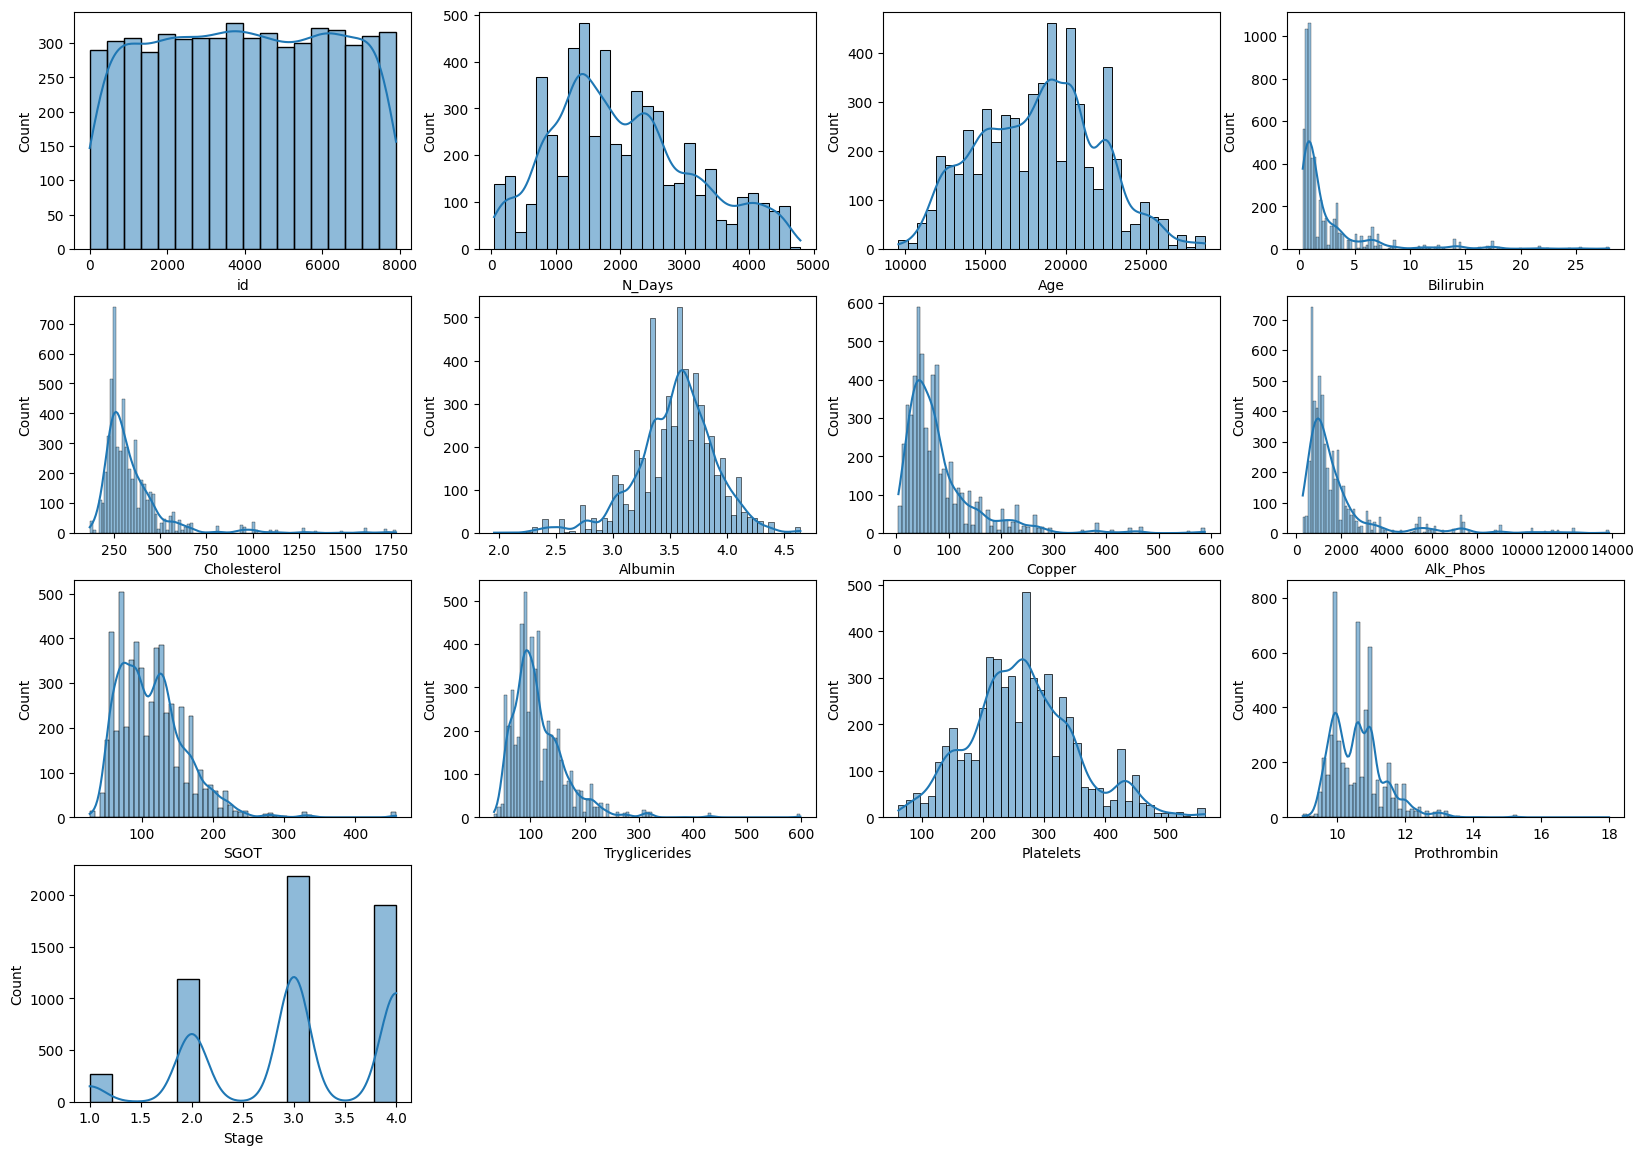

In [11]:
# plot histograms
fig = plt.figure(figsize=(20, 40))
ax = []
for i, val in enumerate(num_cols):
    ax.append(plt.subplot(11, 4, i + 1))
    ax.append(sns.histplot(train_dataset[val], kde=True))
plt.show()
fig.tight_layout()

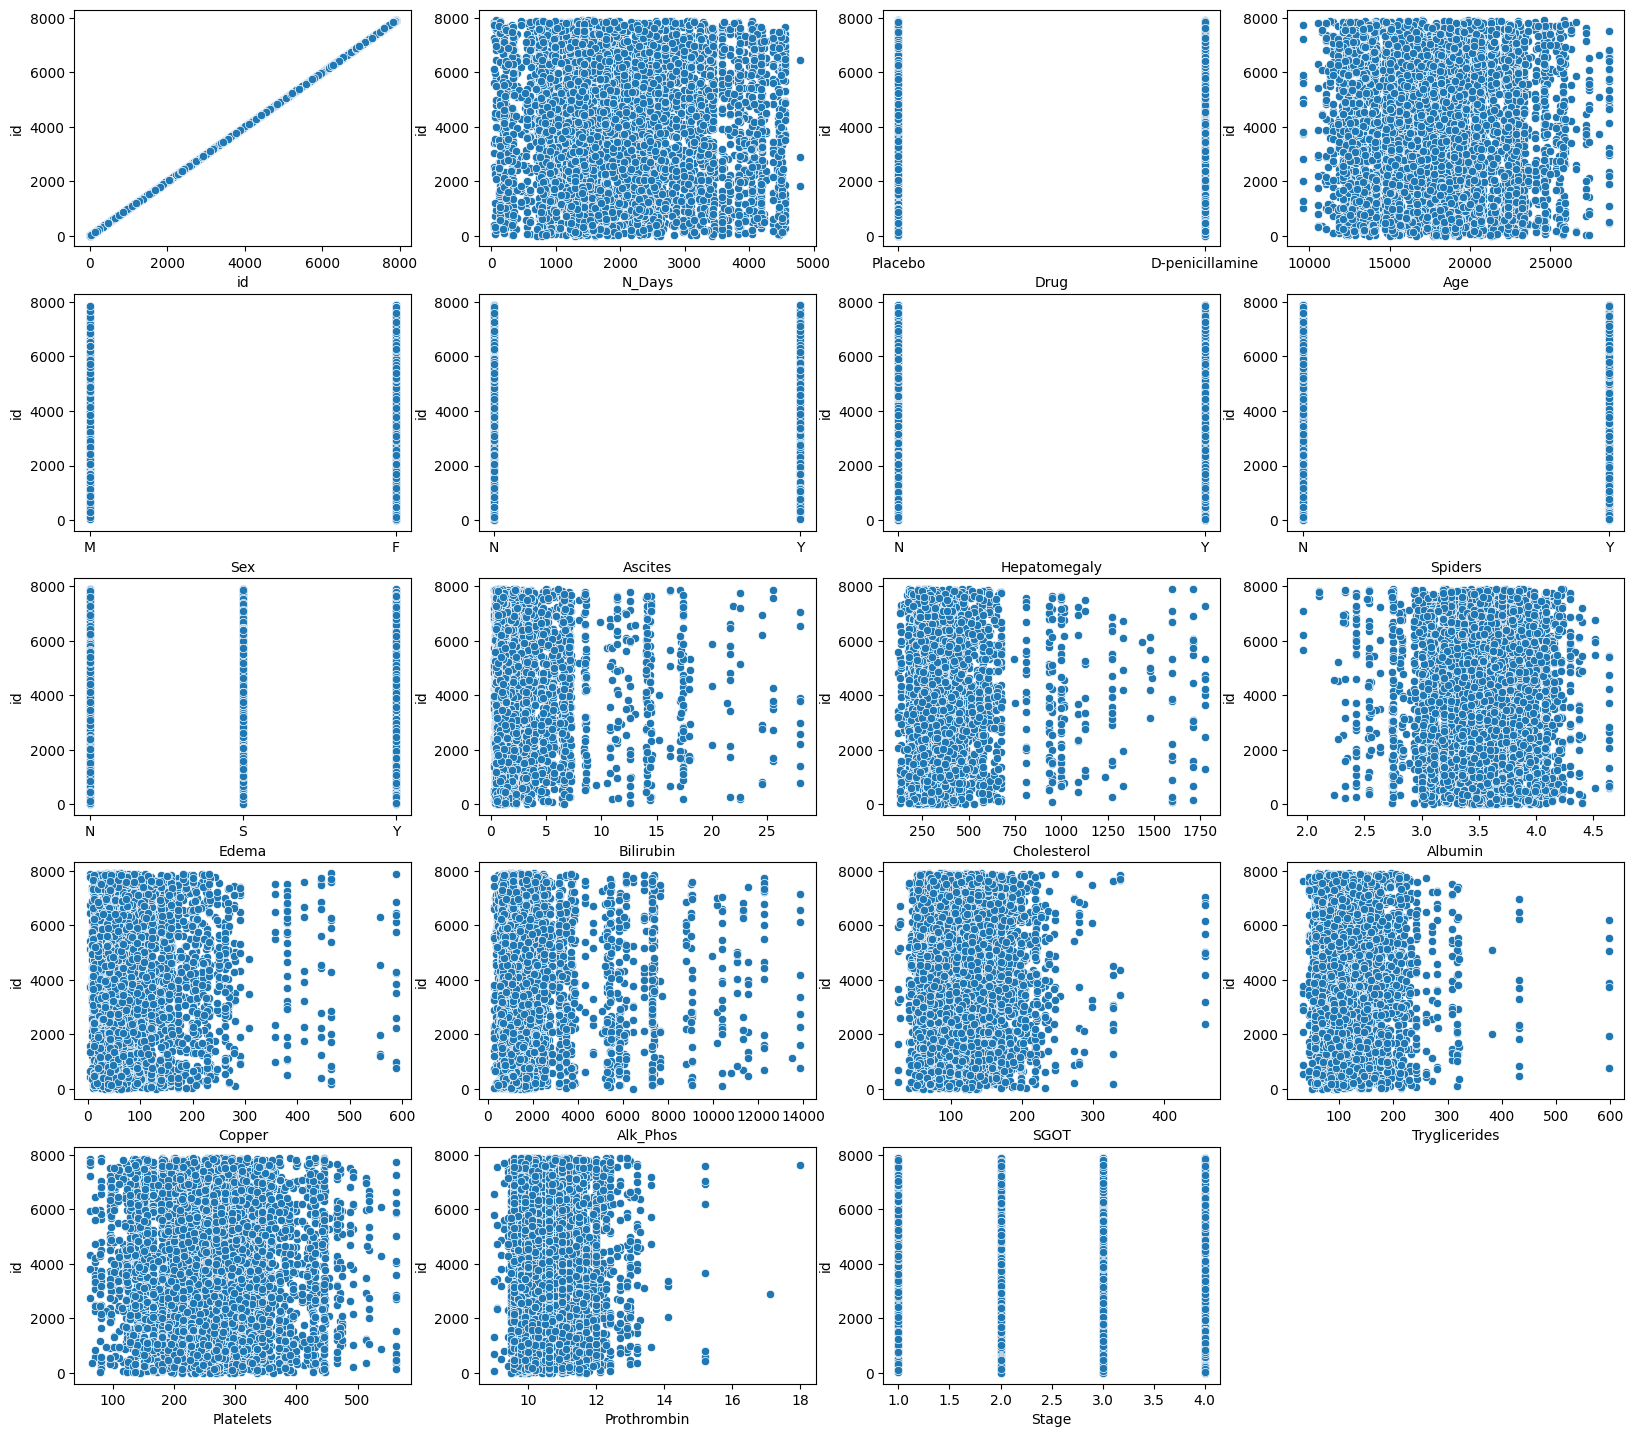

In [12]:
# plot scatterplots against id
fig = plt.figure(figsize=(20, 40))
ax = []
for i, val in enumerate(train_dataset):
    ax.append(fig.add_subplot(11, 4, i+1))
    ax.append(sns.scatterplot(x = val, y = 'id', data=train_dataset))
plt.show()
fig.tight_layout()

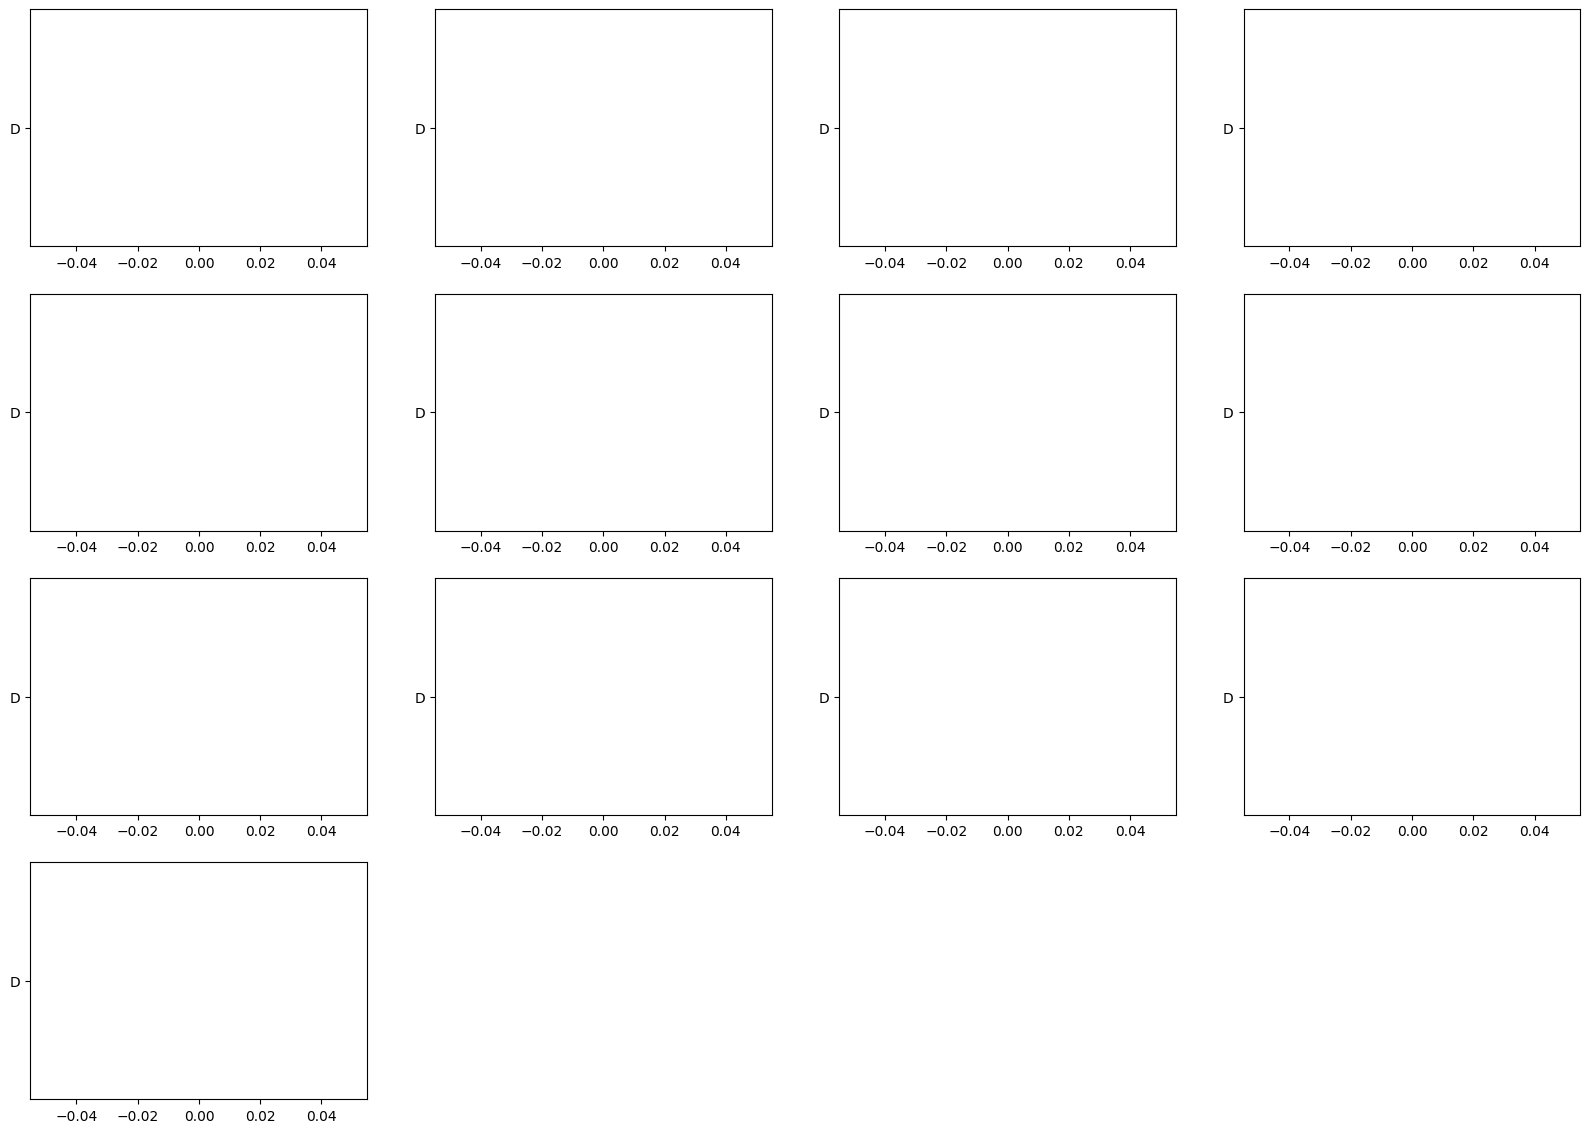

In [13]:
# visualize scatterplots agains target
train_labels_df = train_labels.to_frame(name='Status')
fig = plt.figure(figsize=(20, 40))
ax = []
for i, val in enumerate(num_cols):
    ax.append(fig.add_subplot(11, 4, i + 1))
    ax.append(sns.scatterplot(x=val, y='Status', data=pd.concat([num_data_df, train_labels_df])))
plt.show()
fig.tight_layout()

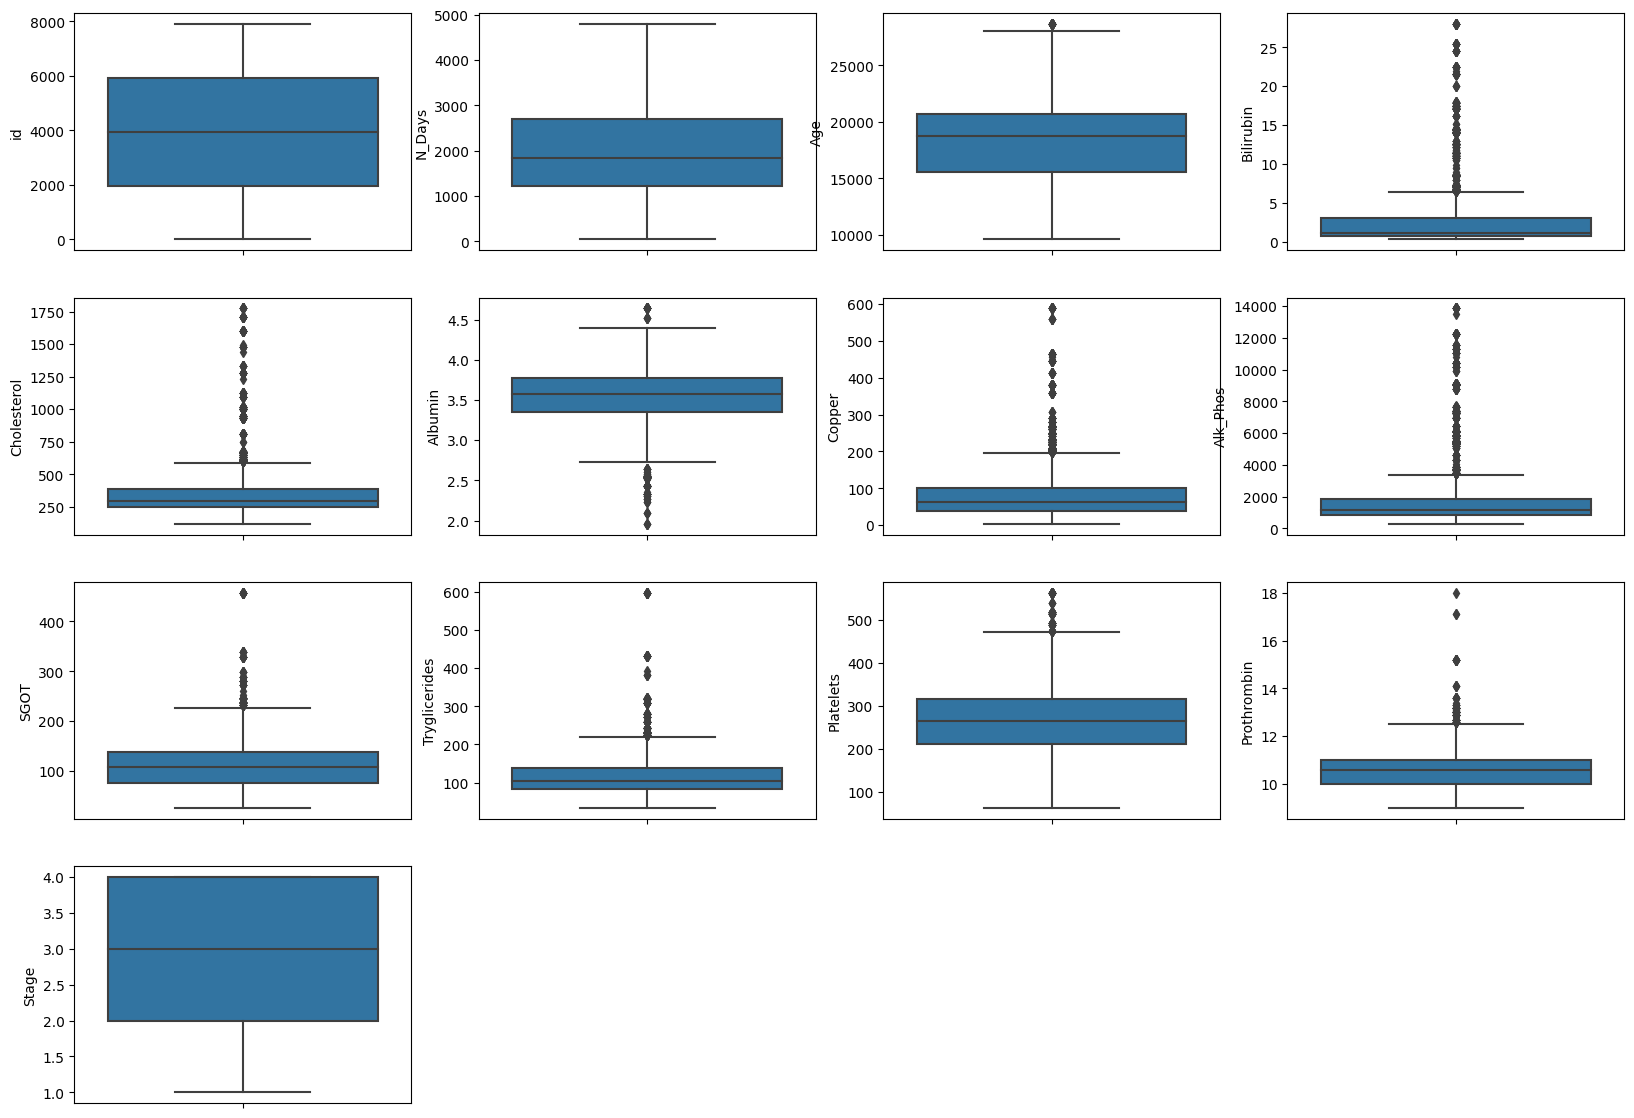

In [14]:
# visualize boxplots
fig = plt.figure(figsize=(20, 40))
ax = []
for i, val in enumerate(num_cols):
    ax.append(fig.add_subplot(11, 4, i+1))
    ax.append(sns.boxplot(y=val, data=train_data[num_cols]))
plt.show()
fig.tight_layout()

<AxesSubplot:>

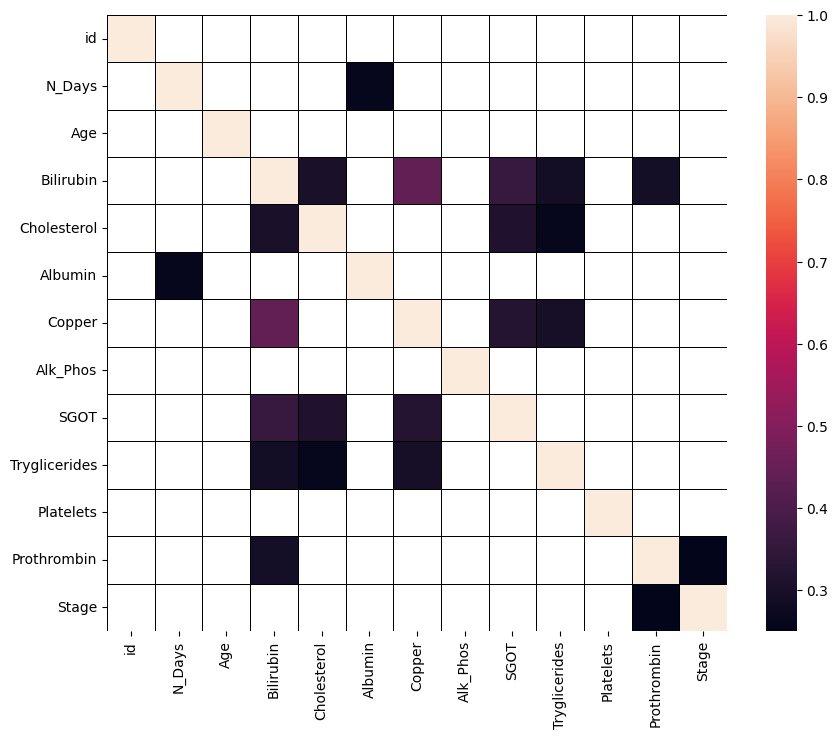

In [15]:
# Multicollinearity 
threshold = 0.25
plt.figure(figsize=(10,8))
correlation = train_dataset[num_cols].corr()
sns.heatmap(correlation, mask = correlation < threshold,linecolor='black',linewidth=.5)

# Preprocessing

## Feature Engineering

##### Removing Features

In [16]:
# Removing Id but keeping a copy for submission
test_ids = test_data['id']

# remove from train_dataset
train_dataset = train_dataset.drop(columns='id')
val_dataset = val_dataset.drop(columns='id')
test_data = test_data.drop(columns='id')

## Categorical Encoding

In [17]:
encoder = OneHotEncoder(handle_unknown='ignore')

# get categorical columns
cat_cols = [cname for cname in train_dataset.columns if 
           train_dataset[cname].dtype == "object"]

print(cat_cols)

# fit the encoder in the train it data and use it in other datasets
train_data_encoded = encoder.fit_transform(train_dataset[cat_cols])
val_data_encoded = encoder.transform(val_dataset[cat_cols])
test_data_encoded = encoder.transform(test_data[cat_cols])

# convert to pandas dataframes
train_data_encoded_df = pd.DataFrame(train_data_encoded.toarray(), columns=encoder.get_feature_names_out(cat_cols))
val_data_encoded_df = pd.DataFrame(val_data_encoded.toarray(), columns=encoder.get_feature_names_out(cat_cols))
test_data_encoded_df = pd.DataFrame(test_data_encoded.toarray(), columns=encoder.get_feature_names_out(cat_cols))

# drop original cat_cols
train_dataset = train_dataset.drop(columns=cat_cols, axis=1)
val_dataset = val_dataset.drop(columns=cat_cols, axis=1)
test_data = test_data.drop(columns=cat_cols, axis=1)

# # concat encoded datasets values with original datasets
train_dataset_encoded = pd.concat([train_dataset.reset_index(drop=True), train_data_encoded_df], axis=1)
val_dataset_encoded = pd.concat([val_dataset.reset_index(drop=True), val_data_encoded_df], axis=1)
test_dataset_encoded = pd.concat([test_data.reset_index(drop=True), test_data_encoded_df], axis=1)
val_dataset_encoded


['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']


,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,971,20555,0.8,328.0,3.50,65.0,688.0,60.45,213.0,265.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1810,20555,3.3,361.0,3.57,34.0,12258.8,72.85,104.0,341.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,2176,17263,1.2,232.0,3.98,11.0,1074.0,100.75,99.0,223.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1462,23331,0.4,258.0,3.74,49.0,559.0,43.40,177.0,284.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1216,19994,0.7,336.0,3.36,44.0,1826.0,97.65,110.0,256.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2367,3707,24681,2.1,562.0,3.83,102.0,975.0,89.90,113.0,151.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2368,1412,15116,3.6,271.0,2.77,208.0,3472.0,110.05,55.0,151.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2369,2157,22156,1.2,274.0,3.50,159.0,1868.0,134.85,128.0,514.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2370,2835,20354,5.1,353.0,2.94,121.0,721.0,106.95,69.0,144.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


## Normalization

In [18]:
scaler = MaxAbsScaler()

train_dataset_scaled = scaler.fit_transform(train_dataset_encoded)
val_dataset_scaled = scaler.fit_transform(val_dataset_encoded)
test_dataset_scaled = scaler.transform(test_dataset_encoded)

print(np.max(train_dataset_scaled))
print(np.min(train_dataset_scaled))

1.0
0.0


# Build The Models

#### Models Implementation

In [19]:
# traditional ML algorithms

logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(train_dataset_scaled, train_labels)

svm_model = SVC(kernel="linear", probability=True)
svm_model.fit(train_dataset_scaled, train_labels)

/Users/manriqs/anaconda3/envs/multiclassPredictionCirrhosisOutcomes/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


SVC(kernel='linear', probability=True)

In [20]:
# neural network
# we have categorical values in our train_labels, we need to encode them so we can feed the nn
label_encoder = LabelEncoder()

train_labels_encoded = label_encoder.fit_transform(train_labels)
print(train_labels_encoded)

val_labels_encoded = label_encoder.fit_transform(val_labels)
print(val_labels_encoded)

[2 0 2 ... 0 0 0]
[0 0 0 ... 0 2 0]


In [41]:
train_dataset_encoded.shape

(5533, 25)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1664      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 3,843
Trainable params: 3,843
Non-trainable params: 0
_________________________________________________________________


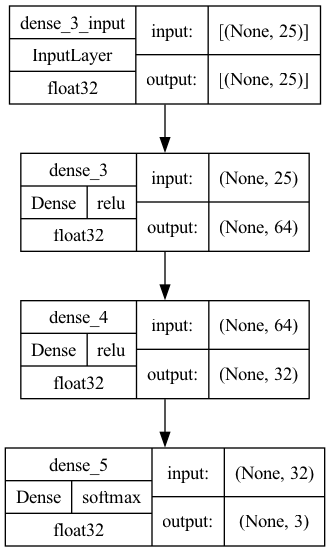

In [40]:
# nn definition
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(train_dataset_scaled.shape[1], )),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

## nn compile
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy', 'sparse_categorical_crossentropy'])

nn_model.summary()

plot_model(
    nn_model, 
    to_file='./nn_model.png', 
    show_shapes=True, 
    show_dtype=True, 
    show_layer_names=True,
    expand_nested=True,
    show_layer_activations=True,
)

In [39]:
# train the model
nn_model.fit(train_dataset_scaled, train_labels_encoded, epochs=10, batch_size=16, validation_data=(val_dataset_scaled, val_labels_encoded))

Epoch 1/10


346/346 [==============================] - 1s 2ms/step - loss: 0.4716 - accuracy: 0.8176 - sparse_categorical_crossentropy: 0.4716 - val_loss: 0.5308 - val_accuracy: 0.8019 - val_sparse_categorical_crossentropy: 0.5308
Epoch 2/10
346/346 [==============================] - 0s 1ms/step - loss: 0.4693 - accuracy: 0.8194 - sparse_categorical_crossentropy: 0.4693 - val_loss: 0.5181 - val_accuracy: 0.8027 - val_sparse_categorical_crossentropy: 0.5181
Epoch 3/10
346/346 [==============================] - 0s 1ms/step - loss: 0.4687 - accuracy: 0.8178 - sparse_categorical_crossentropy: 0.4687 - val_loss: 0.5127 - val_accuracy: 0.8056 - val_sparse_categorical_crossentropy: 0.5127
Epoch 4/10
346/346 [==============================] - 0s 1ms/step - loss: 0.4628 - accuracy: 0.8180 - sparse_categorical_crossentropy: 0.4628 - val_loss: 0.5125 - val_accuracy: 0.8048 - val_sparse_categorical_crossentropy: 0.5125
Epoch 5/10
346/346 [==============================] - 1s 1ms/step - loss: 0.4661 - accuracy

### Make Predictions

In [25]:
# predict with linear regression
val_preds_lr_model_prob = logistic_regression_model.predict_proba(val_dataset_scaled)
lr_loss = log_loss(val_labels, val_preds_lr_model_prob)
print("lr loss: ", lr_loss)

# predict with support vector machines
val_preds_svm_model_prob = svm_model.predict_proba(val_dataset_scaled)
svm_loss = log_loss(val_labels, val_preds_svm_model_prob)
print("svm loss", svm_loss)

# predict with nn 
val_preds_nn_model_prob = nn_model.predict(val_dataset_scaled)
val_preds_nn_model_prob.shape

lr loss:  0.5290185806391503
svm loss 0.5470558916586092
75/75 [==============================] - 0s 910us/step


(2372, 3)

# Submissions

In [26]:
# predictions using traditional ML algorithms
preds = svm_model.predict_proba(test_dataset_scaled)

In [27]:
# predictions using neural networks 
preds_nn = nn_model.predict(test_dataset_scaled)

165/165 [==============================] - 0s 1ms/step


In [28]:
# traditional ML submission
submission = pd.DataFrame({
    "id": test_ids,
    "Status_C": preds[:, 0],
    "Status_CL": preds[:, 1],
    "Status_D": preds[:, 2]
})

submission.head()

,id,Status_C,Status_CL,Status_D
0,7905,0.793754,0.017523,0.188723
1,7906,0.825976,0.032998,0.141026
2,7907,0.121053,0.079790,0.799157
3,7908,0.839702,0.027579,0.132720
4,7909,0.681219,0.028136,0.290644


In [29]:
# submission nn
submission_nn = pd.DataFrame({
    "id": test_ids,
    "Status_C": preds_nn[:, 0],
    "Status_CL": preds_nn[:, 1],
    "Status_D": preds_nn[:, 2]
})
submission.head()

,id,Status_C,Status_CL,Status_D
0,7905,0.793754,0.017523,0.188723
1,7906,0.825976,0.032998,0.141026
2,7907,0.121053,0.079790,0.799157
3,7908,0.839702,0.027579,0.132720
4,7909,0.681219,0.028136,0.290644


In [30]:
# create traditional ML submission file 
submission.to_csv('./submissions/nn_model_submission.csv', index=False, header=True)
# create nn submission file
submission_nn.to_csv('./submissions/nn_model_submission.csv', index=False, header=True)